In [13]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import tarfile


# Path to the .tgz file
tgz_file_path = r"C:\Users\SOOQ ELASER\LanguageTranslation\fr-en.tgz"

# Extract the .tgz file
with tarfile.open(tgz_file_path, "r:gz") as tar:
    tar.extractall(path=r"C:\Users\SOOQ ELASER\LanguageTranslation\extracted")  # Specify an extraction folder


C:\Users\SOOQ ELASER\AppData\Local\Temp\ipykernel_60140\3468146672.py:9: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=r"C:\Users\SOOQ ELASER\LanguageTranslation\extracted")  # Specify an extraction folder


In [5]:


# Paths to the extracted files
french_file_path = r"C:\Users\SOOQ ELASER\LanguageTranslation\extracted\europarl-v7.fr-en.fr"
english_file_path = r"C:\Users\SOOQ ELASER\LanguageTranslation\extracted\europarl-v7.fr-en.en"

# Load the data
with open(french_file_path, "r", encoding="utf-8") as fr_file, open(english_file_path, "r", encoding="utf-8") as en_file:
    french_sentences = fr_file.readlines()
    english_sentences = en_file.readlines()

# Create a DataFrame
df = pd.DataFrame({
    "French": [line.strip() for line in french_sentences],
    "English": [line.strip() for line in english_sentences]
})

# Display the first few rows
print(df.head())

# Save to CSV for future use (optional)
df.to_csv(r"C:\Users\SOOQ ELASER\LanguageTranslation\extracted\parallel_corpus.csv", index=False)


                                              French  \
0                              Reprise de la session   
1  Je déclare reprise la session du Parlement eur...   
2  Comme vous avez pu le constater, le grand "bog...   
3  Vous avez souhaité un débat à ce sujet dans le...   
4  En attendant, je souhaiterais, comme un certai...   

                                             English  
0                          Resumption of the session  
1  I declare resumed the session of the European ...  
2  Although, as you will have seen, the dreaded '...  
3  You have requested a debate on this subject in...  
4  In the meantime, I should like to observe a mi...  


In [6]:
df.head()

,French,English
0,Reprise de la session,Resumption of the session
1,Je déclare reprise la session du Parlement eur...,I declare resumed the session of the European ...
2,"Comme vous avez pu le constater, le grand ""bog...","Although, as you will have seen, the dreaded '..."
3,Vous avez souhaité un débat à ce sujet dans le...,You have requested a debate on this subject in...
4,"En attendant, je souhaiterais, comme un certai...","In the meantime, I should like to observe a mi..."


In [8]:
df.shape

(2007723, 2)

In [9]:
df.describe()

,French,English
count,2007723,2007723
unique,1954562,1953216
top,Le débat est clos.,The debate is closed.
freq,3937,4407


In [11]:
unique_french_sentences = df['French'].nunique()
unique_english_sentences = df['English'].nunique()
print(f"Unique French Sentences: {unique_french_sentences}")
print(f"Unique English Sentences: {unique_english_sentences}")

Unique French Sentences: 1954562
Unique English Sentences: 1953216


In [12]:
print("\nMissing Data Check:")
missing_data = df.isnull().sum()
print(missing_data)


Missing Data Check:
French     0
English    0
dtype: int64


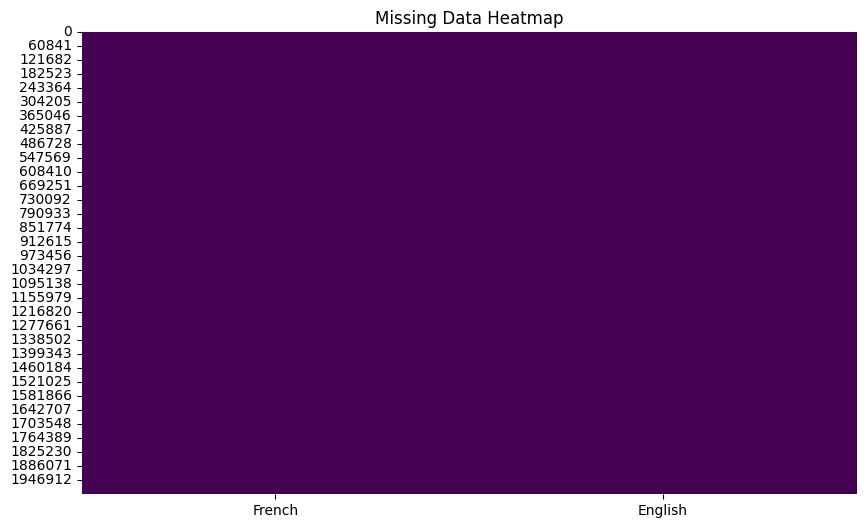

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

## Why This Is Important

### 1. Understanding Sentence Complexity
- **Long sentences** might indicate:
  - Complex translations.
  - Potential alignment issues between source and target sentences.
- **Short sentences** might lack meaningful content or context.

### 2. Comparison Between Languages
- Helps analyze whether translations tend to expand or condense the content:
  - **French** sentences might be longer due to grammatical structure.
  - **English** sentences might be shorter and more concise.

### 3. Identifying Outliers
- Sentences that are unusually short or long compared to the average can indicate:
  - Errors, such as truncated or incomplete translations.
  - Outliers that may need manual correction or special handling.

### 4. Feature Engineering
- Sentence lengths can be used as features in downstream tasks, such as:
  - Training a language translation model.
  - Detecting sentence alignment issues.
  - Building models to predict translation quality.


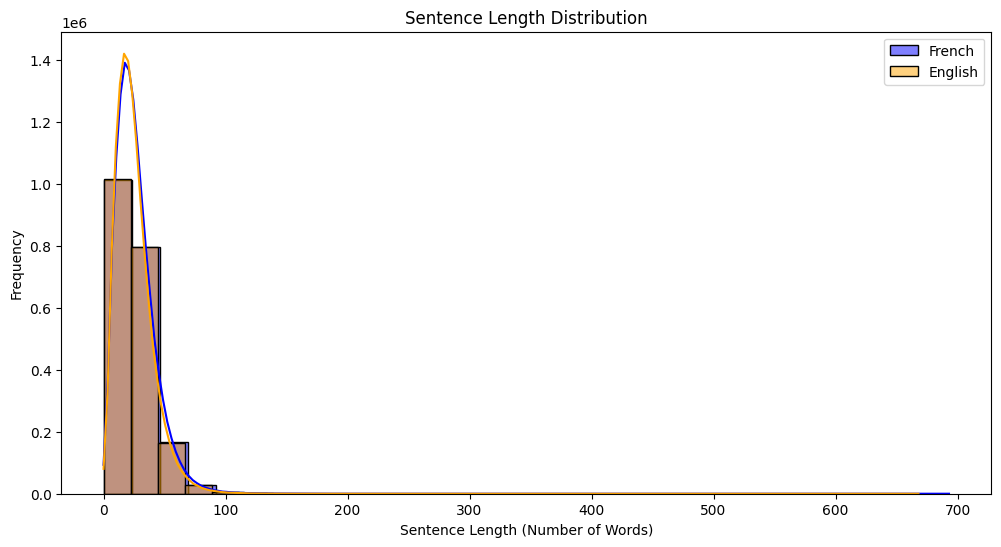

In [16]:
# 3. Language Distribution (French and English Sentence Lengths)
# Calculate sentence lengths
df['French_Length'] = df['French'].apply(lambda x: len(str(x).split()))
df['English_Length'] = df['English'].apply(lambda x: len(str(x).split()))

# Plot sentence length distributions
plt.figure(figsize=(12, 6))
sns.histplot(df['French_Length'], kde=True, color='blue', label='French', bins=30)
sns.histplot(df['English_Length'], kde=True, color='orange', label='English', bins=30)
plt.legend()
plt.title("Sentence Length Distribution")
plt.xlabel("Sentence Length (Number of Words)")
plt.ylabel("Frequency")
plt.show()

# Sentence Length Distribution Analysis

The graph illustrates the distribution of sentence lengths (in terms of the number of words) for French and English texts. Below is a detailed interpretation, emphasizing the relationship to unbalanced datasets.

---

## 1. **General Distribution Characteristics**
- Both **French** and **English** distributions follow a **right-skewed pattern**:
  - A majority of sentences are short, within 0–20 words.
  - A small number of sentences extend beyond 100 words, representing longer sentences and outliers.
- The similarity between the two curves shows that the typical sentence lengths in French and English are comparable.

---

## 2. **Frequency Peaks**
- The peak frequency for both languages is concentrated in the **lower length range**:
  - This indicates that most sentences in the dataset are relatively short.
  - These short sentences dominate the dataset, as seen by the high bars in the 0–20 range.

---

## 3. **Long Sentences and Tail Distribution**
- The **right tail** of the distribution represents long sentences, and these occur infrequently in both French and English.
- However, even though their frequencies are low, these long sentences are critical as they may introduce challenges in translation due to their complexity.

---

## 4. **Unbalanced Dataset Issues**
### 4.1 **Dominance of Short Sentences**
- The dataset appears to be **unbalanced** because short sentences (0–20 words) dominate the distribution.
  - This imbalance can create issues when training models or performing translations:
    - **Underrepresentation of Long Sentences**: Longer sentences, which are less frequent, may not be well-learned or adequately handled by machine translation systems.
    - **Bias Toward Short Sentences**: Models may prioritize the structure and syntax of shorter sentences, leading to poorer performance on longer, more complex sentences.

### 4.2 **Impact on Translation**
- **Consistency Challenges**:
  - The dominance of short sentences might make it easier to achieve consistency in translations for common sentence lengths.
  - However, translating outlier sentences (long ones) could result in inaccuracies or loss of meaning due to their underrepresentation in the dataset.
- **Sentence Complexity**:
  - Long sentences often involve more complex grammatical structures, idiomatic expressions, or nested clauses, which can further complicate translation efforts.

---

## 5. **Recommendations to Address Dataset Imbalance**
1. **Preprocessing for Balance**:
   - Augment the dataset with additional long sentences to reduce the imbalance and better represent diverse sentence lengths.
   - Use data sampling techniques to ensure an equal representation of short and long sentences during model training.
   
2. **Custom Model Training**:
   - Train translation models with specific focus or weighting on longer sentences to improve their handling of complex cases.
   - Implement loss functions that give greater importance to rare, longer sentences.

3. **Evaluation and Testing**:
   - Include a separate evaluation set with a balanced mix of short and long sentences.
   - Monitor the performance of the translation system on outliers (e.g., sentences longer than 100 words) to identify areas of improvement.

---

## 6. **Conclusion**
- The graph demonstrates that while sentence lengths in French and English are similar, the dominance of short sentences highlights an **unbalanced dataset**.
- Addressing this imbalance is crucial for building effective and robust translation models that can handle sentences of varying lengths, including rare, long outliers.
- Tailored preprocessing, model training, and evaluation approaches are recommended to mitigate the effects of this imbalance and ensure high-quality translations for all sentence types.

---


In [19]:

# Calculate Sentence Lengths
df['French_Length'] = df['French'].apply(lambda x: len(str(x).split()))
df['English_Length'] = df['English'].apply(lambda x: len(str(x).split()))

# Get top 50 longest French sentences
top_50_french = df.nlargest(50, 'French_Length')[['French', 'French_Length']]

# Get top 50 longest English sentences
top_50_english = df.nlargest(50, 'English_Length')[['English', 'English_Length']]



print("\nTop 50 Longest English Sentences:")
print(top_50_english)



Top 50 Longest English Sentences:
                                                   English  English_Length
1721334  B4-0825/97 by Mrs André-Léonard, Mr Fassa and ...             668
1764998  B4-0012/99 - O-0009/98 and B4-0013/98 - O-0010...             668
1758905  B4-0050/98 by Mr Pompidou, Mr Scapagnini and M...             633
1688205  (B4-0468/97) by Mr Cars and others, on behalf ...             508
1721810  B4-0823/97 by Mr Graziani and others, on behal...             469
1653004  B4-0191/97 by Mr Cars and Mr La Malfa, on beha...             420
1564698  by Mr Rehn and others, on behalf of the Group ...             407
1773218  Report (A4-0067/98) by Mr Trakatellis, on beha...             382
1589709  by Mr Ligabue, Mr Pasty and Mrs Todini, on beh...             367
1893365  A4-0437/98 by Mr Elchlepp, on behalf of the Co...             367
1674474  B4-0388/97 by Mr André-Léonard, on behalf of t...             357
1643146  53rd session of the UN Human Rights Commission...       

In [20]:
# Display the results
print("Top 50 Longest French Sentences:")
print(top_50_french)

Top 50 Longest French Sentences:
                                                    French  French_Length
1764998  B4-0012/98 - O-0009/98 et B4-0013/98 - O-0010/...            693
1721334  B4-0825/97 des députés André-Léonard, Fassa et...            497
1688205  (B4-0468/97) des députés Cars et autres, au no...            491
1589709  les questions orales que M. Ligabue, M. Pasty ...            465
1758905  B4-0050/98 des députés Pompidou, Scapagnini et...            452
1564698  de M. O. Rehn et autres, au nom du groupe du p...            402
1773218  rapport (A4-0067/98) de M. Trakatellis, au nom...            392
1941314  A4-0149/99 de M. Donner, au nom de la commissi...            375
1674474  B4-0388/97, de M. André Léonard, au nom du Par...            364
1721810  B4-0823/97 des députés Graziani et autres, au ...            360
1893365  A4-0437/98 de M. Elchlepp, sur la proposition ...            360
1643146  53ème session de la commission des droits de l...            337
17364

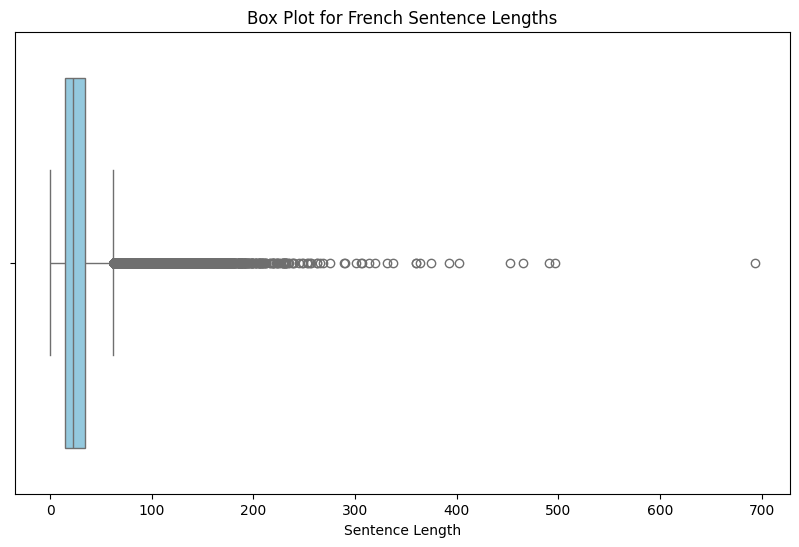

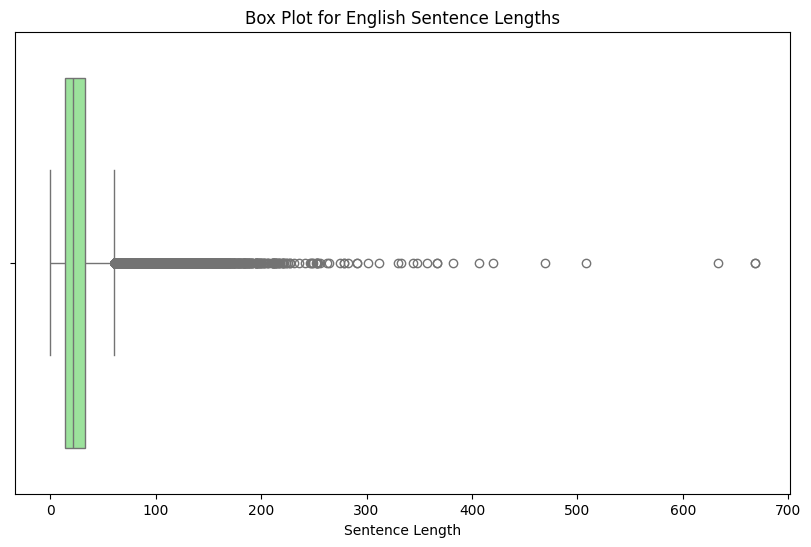

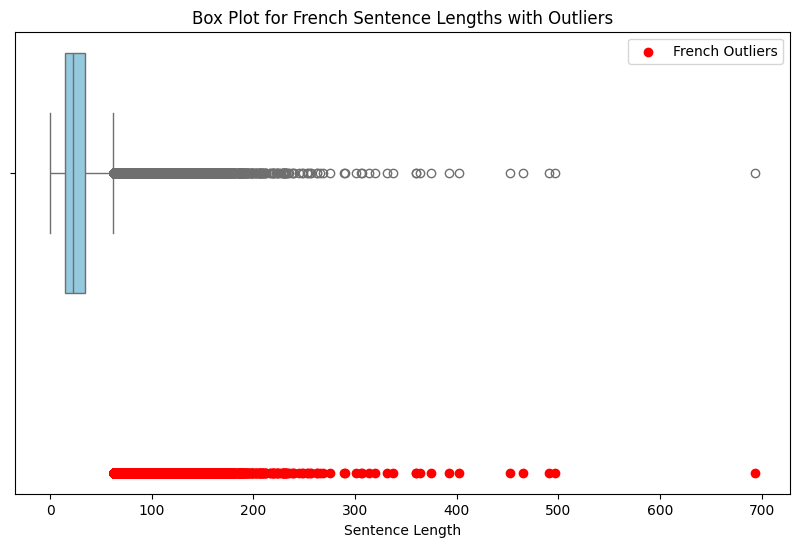

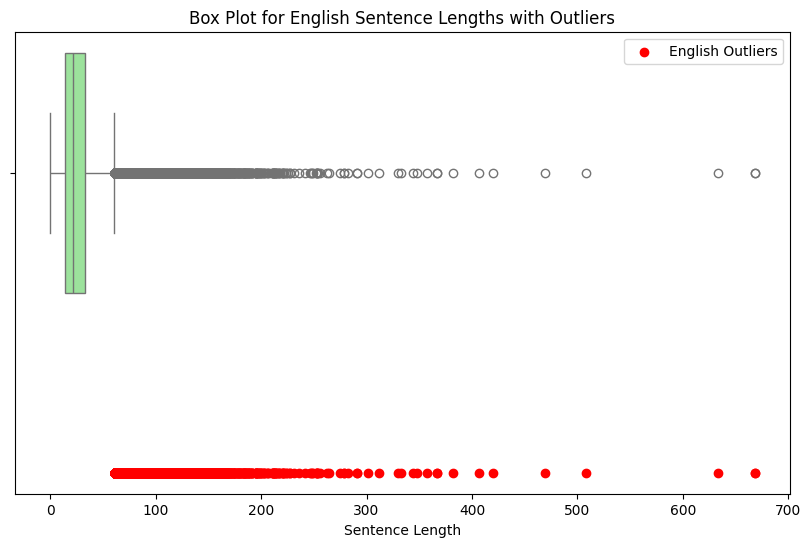

In [23]:


# Calculate Sentence Lengths
df['French_Length'] = df['French'].apply(lambda x: len(str(x).split()))
df['English_Length'] = df['English'].apply(lambda x: len(str(x).split()))

# Method 1: Using IQR to detect outliers
def detect_outliers_iqr(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # Identify outliers
    return df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]

# Detect outliers in French and English based on IQR
french_outliers_iqr = detect_outliers_iqr(df, 'French_Length')
english_outliers_iqr = detect_outliers_iqr(df, 'English_Length')

# Plotting Box Plot for French Sentence Lengths
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['French_Length'], color='skyblue')
plt.title("Box Plot for French Sentence Lengths")
plt.xlabel("Sentence Length")
plt.show()

# Plotting Box Plot for English Sentence Lengths
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['English_Length'], color='lightgreen')
plt.title("Box Plot for English Sentence Lengths")
plt.xlabel("Sentence Length")
plt.show()

# Optional: Show the outliers (highlighted points)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['French_Length'], color='skyblue')
plt.scatter(french_outliers_iqr['French_Length'], 
            [1] * len(french_outliers_iqr), 
            color='red', label="French Outliers")
plt.title("Box Plot for French Sentence Lengths with Outliers")
plt.xlabel("Sentence Length")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['English_Length'], color='lightgreen')
plt.scatter(english_outliers_iqr['English_Length'], 
            [1] * len(english_outliers_iqr), 
            color='red', label="English Outliers")
plt.title("Box Plot for English Sentence Lengths with Outliers")
plt.xlabel("Sentence Length")
plt.legend()
plt.show()


# Interpretation of Sentence Length Box Plots

The graphs illustrate the distribution of sentence lengths in French and English texts and identify outliers in each dataset. Below is the detailed interpretation:

## 1. Box Plot for French Sentence Lengths
- The box plot shows the central tendency and variability of French sentence lengths.
- The majority of sentence lengths are clustered within a relatively small range (as indicated by the size of the box).
- There are significant outliers, represented as points far beyond the whiskers. These outliers are sentences much longer than the typical French sentence lengths.

## 2. Box Plot for English Sentence Lengths
- Similarly, the box plot for English sentence lengths demonstrates the central range of typical sentence lengths.
- The English data also includes substantial outliers, with some sentences being notably longer than average.

## 3. Outliers in French and English Sentence Lengths
- The third and fourth graphs include red points to explicitly mark outliers for French and English texts, respectively.
- **Purpose of Outliers**: These outliers might represent unusually complex or verbose sentences. For translation purposes, these longer sentences could pose challenges, such as:
  - Increased difficulty in maintaining the sentence's semantic meaning and fluency.
  - Potential need for sentence restructuring or breaking down into smaller units during translation.
- It's worth noting that the presence of outliers in both languages suggests variability in sentence complexity, which needs to be accounted for when translating between French and English.

## Key Takeaways for Translation
- While translating, focus on the identified outliers, as they could require special attention due to their length and complexity.
- The majority of sentences fall within a consistent range, which should be easier to handle for translation tools or methods.
- Pre-processing strategies, such as segmenting long sentences, may help manage these outliers effectively.


In [24]:
# 1. Basic Sentence Length Features
# Calculate the number of words in each French sentence
df['French_Length'] = df['French'].apply(lambda x: len(str(x).split()))

# Calculate the number of words in each English sentence
df['English_Length'] = df['English'].apply(lambda x: len(str(x).split()))

# 2. Sentence Length Normalization
# Normalize French sentence length by dividing by the maximum length in the dataset
df['French_Length_Normalized'] = df['French_Length'] / df['French_Length'].max()

# Normalize English sentence length by dividing by the maximum length in the dataset
df['English_Length_Normalized'] = df['English_Length'] / df['English_Length'].max()

# Display the first few rows to check the new features
print(df[['French', 'French_Length', 'French_Length_Normalized', 'English', 'English_Length', 'English_Length_Normalized']].head())


                                              French  French_Length  \
0                              Reprise de la session              4   
1  Je déclare reprise la session du Parlement eur...             33   
2  Comme vous avez pu le constater, le grand "bog...             37   
3  Vous avez souhaité un débat à ce sujet dans le...             19   
4  En attendant, je souhaiterais, comme un certai...             38   

   French_Length_Normalized  \
0                  0.005772   
1                  0.047619   
2                  0.053391   
3                  0.027417   
4                  0.054834   

                                             English  English_Length  \
0                          Resumption of the session               4   
1  I declare resumed the session of the European ...              38   
2  Although, as you will have seen, the dreaded '...              31   
3  You have requested a debate on this subject in...              19   
4  In the meantime, I shou

In [25]:
df.head()

,French,English,French_Length,English_Length,French_Length_Normalized,English_Length_Normalized
0,Reprise de la session,Resumption of the session,4,4,0.005772,0.005988
1,Je déclare reprise la session du Parlement eur...,I declare resumed the session of the European ...,33,38,0.047619,0.056886
2,"Comme vous avez pu le constater, le grand ""bog...","Although, as you will have seen, the dreaded '...",37,31,0.053391,0.046407
3,Vous avez souhaité un débat à ce sujet dans le...,You have requested a debate on this subject in...,19,19,0.027417,0.028443
4,"En attendant, je souhaiterais, comme un certai...","In the meantime, I should like to observe a mi...",38,40,0.054834,0.059880


In [26]:
# 1. Length Ratio (French to English)
# Compare the sentence lengths between French and English
df['Length_Ratio'] = df['French_Length'] / df['English_Length']

# 2. Length Difference (French to English)
# Calculate the difference in sentence lengths between French and English
df['Length_Difference'] = df['French_Length'] - df['English_Length']

# Display the first few rows to check the new features
print(df[['French', 'English', 'French_Length', 'English_Length', 'Length_Ratio', 'Length_Difference']].head())


                                              French  \
0                              Reprise de la session   
1  Je déclare reprise la session du Parlement eur...   
2  Comme vous avez pu le constater, le grand "bog...   
3  Vous avez souhaité un débat à ce sujet dans le...   
4  En attendant, je souhaiterais, comme un certai...   

                                             English  French_Length  \
0                          Resumption of the session              4   
1  I declare resumed the session of the European ...             33   
2  Although, as you will have seen, the dreaded '...             37   
3  You have requested a debate on this subject in...             19   
4  In the meantime, I should like to observe a mi...             38   

   English_Length  Length_Ratio  Length_Difference  
0               4      1.000000                  0  
1              38      0.868421                 -5  
2              31      1.193548                  6  
3              19      1

In [27]:
df.head()

,French,English,French_Length,English_Length,French_Length_Normalized,English_Length_Normalized,Length_Ratio,Length_Difference
0,Reprise de la session,Resumption of the session,4,4,0.005772,0.005988,1.000000,0
1,Je déclare reprise la session du Parlement eur...,I declare resumed the session of the European ...,33,38,0.047619,0.056886,0.868421,-5
2,"Comme vous avez pu le constater, le grand ""bog...","Although, as you will have seen, the dreaded '...",37,31,0.053391,0.046407,1.193548,6
3,Vous avez souhaité un débat à ce sujet dans le...,You have requested a debate on this subject in...,19,19,0.027417,0.028443,1.000000,0
4,"En attendant, je souhaiterais, comme un certai...","In the meantime, I should like to observe a mi...",38,40,0.054834,0.059880,0.950000,-2


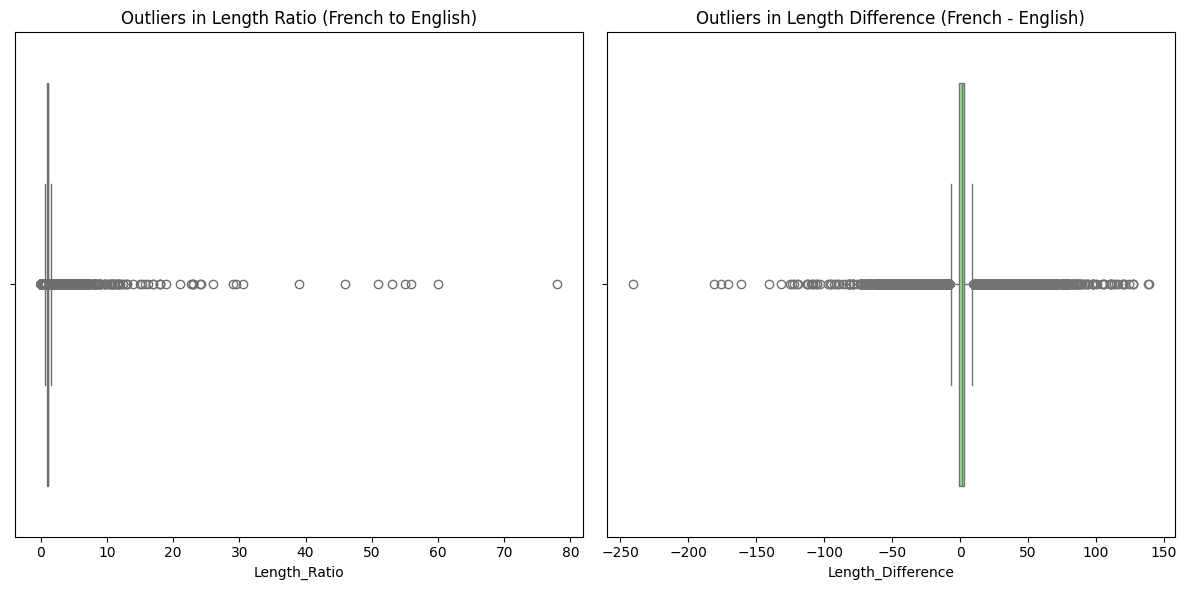

In [31]:


# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot Length Ratio outliers
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Length_Ratio'], color='skyblue')
plt.title('Outliers in Length Ratio (French to English)')

# Plot Length Difference outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Length_Difference'], color='lightgreen')
plt.title('Outliers in Length Difference (French - English)')

# Adjust layout
plt.tight_layout()
plt.show()


# Analysis of Outliers in Sentence Lengths: French to English

The two plots above analyze **sentence length differences** and **length ratios** between French and English sentences, focusing on outliers in the dataset.

---

## 1. **Understanding the Plots**

### 1.1 **Left Plot: Length Ratio**
- **X-axis**: Represents the ratio of French sentence length to English sentence length (`Length_Ratio = Length_French / Length_English`).
- **Y-axis**: Represents the frequency or distribution of data points (sentences).
- **Purpose**: Highlights outliers where one language’s sentence length is disproportionately longer compared to the other.

### 1.2 **Right Plot: Length Difference**
- **X-axis**: Represents the absolute difference in length between French and English sentences (`Length_Difference = Length_French - Length_English`).
- **Y-axis**: Similar to the left plot, shows the frequency or spread of the data.
- **Purpose**: Shows deviations where French sentences are significantly longer or shorter than their English counterparts.

---

## 2. **Key Observations**

### 2.1 **Outliers in Length Ratio (Left Plot)**
- Most of the data points cluster around a **length ratio near 1**, meaning that for most sentences, the number of words in French and English are approximately equal.
- However, there are **extreme outliers** where the length ratio exceeds 10, 20, or even higher:
  - These are cases where French sentences are disproportionately longer compared to English (or vice versa).
  - Possible reasons:
    - **Translation discrepancies**: Some sentences may require significantly more (or fewer) words in one language to convey the same meaning.
    - **Data errors**: Outliers could result from poor translations, incomplete sentences, or typos in the dataset.

### 2.2 **Outliers in Length Difference (Right Plot)**
- Most data points are centered around **0**, indicating that French and English sentences generally have similar lengths.
- Outliers exist on both ends of the spectrum:
  - **Positive outliers**: French sentences are significantly longer than English sentences.
  - **Negative outliers**: English sentences are significantly longer than French sentences.
- The outliers stretch up to **±250 words**, showing extreme differences in sentence lengths.

---

## 3. **Impact of Outliers on Dataset**

### 3.1 **Challenges for Machine Translation Models**
- **Disproportionate lengths**: Outliers can confuse models trained on sentence-aligned corpora. If one language consistently requires significantly longer sentences, the model may struggle to learn proper alignments.
- **Translation quality**: These length discrepancies can result in:
  - Loss of context or detail when translating long sentences into shorter ones.
  - Over-generation or under-generation when trying to balance sentence lengths.

### 3.2 **Potential Causes of Outliers**
- **Linguistic differences**:
  - Some languages require more words to express the same idea due to grammatical structure, idiomatic expressions, or verbosity.
- **Errors in the dataset**:
  - Misalignments or truncations during preprocessing may introduce artificial outliers.
- **Domain-specific language**:
  - Certain technical or formal texts may naturally exhibit higher length ratios or differences.

---

## 4. **Recommendations to Handle Outliers**

1. **Data Cleaning**:
   - Identify and review extreme outliers to check for potential misalignments or preprocessing errors.
   - Remove or down-weight these outliers if they do not represent the general dataset.

2. **Augmentation**:
   - Add similar-length sentence pairs to balance the dataset.
   - For extreme cases, include paraphrased translations that bridge large length gaps.

3. **Custom Loss Functions**:
   - During training, design loss functions to account for length differences, giving less importance to extreme outliers.

4. **Evaluation**:
   - Use a separate test set that includes outliers to assess the model’s ability to handle such cases.

---

## 5. **Conclusion**
- These plots reveal important insights into the dataset, particularly the existence of outliers where French and English sentences differ significantly in length.
- Addressing these outliers through proper preprocessing and model adjustments is crucial to ensure robust and reliable machine translation.
